<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Support%20Vector%20Machine/Kernel_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Bài toán với dữ liệu không linearly separable

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

np.random.seed(2)

In [16]:
def visualize_data(X, y):
    X0 = X[y == 0, :]
    X1 = X[y == 1, :]
    X2 = X[y == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 7)
    plt.plot(X1[:, 0], X1[:, 1], 'g^', markersize = 7)
    plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 7)

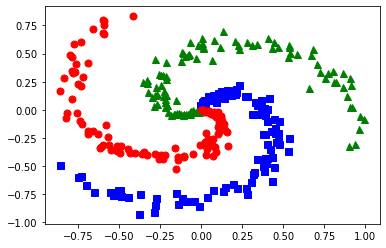

In [17]:
N = 100
dimension = 2
number_labels = 3
X = np.zeros((N * number_labels, dimension))
y = np.zeros(N * number_labels, dtype='uint8')

for j in range(number_labels):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix, :] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

visualize_data(X, y)

In [18]:
model = SVC(kernel='poly', gamma=50, coef0 = 1)
model.fit(X, y)

SVC(coef0=1, gamma=50, kernel='poly')

In [19]:
def display_result(model, X, y):
    visualize_data(X, y)
    visualize_model(model)
    plt.xlabel('Ox')
    plt.ylabel('Oy')
    plt.show()
    
def visualize_model(model):
    x1 = np.arange(-2, 1.5, 0.025)
    x2 = np.arange(-2, 1.5, 0.025)
    x1, x2 = np.meshgrid(x1, x2)
    
    xx1 = x1.ravel().reshape(x1.size, 1)
    xx2 = x2.ravel().reshape(x2.size, 1)
    
    X = np.concatenate((xx1, xx2), axis = 1)
    y = model.predict(X)
    y = y.reshape(x1.shape)
    plt.contourf(x1, x2, y, 200, cmap='jet', alpha = .1)

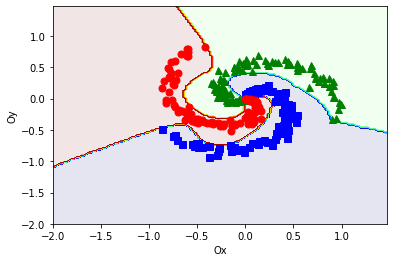

In [20]:
display_result(model, X, y)